## Titanic Project (Kaggle)

In [143]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#{}
#from pylab import rcParams
#rcParams['figure.figsize'] = 15, 30

In [144]:
titanicDF = pd.read_csv('train.csv')
titanicDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


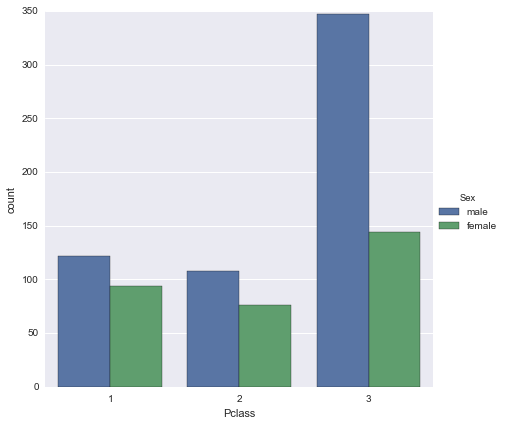

In [145]:

sns.factorplot('Pclass', data=titanicDF, hue='Sex', kind='count', size=6)
plt.figure(figsize=(12, 6))

In [146]:
def maleFemaleChild(passenger) :
    age, sex = passenger
    if age < 16 :
        return 'child'
    else :
        return sex

In [147]:
titanicDF['Person'] = titanicDF[['Age', 'Sex']].apply(maleFemaleChild, axis=1)

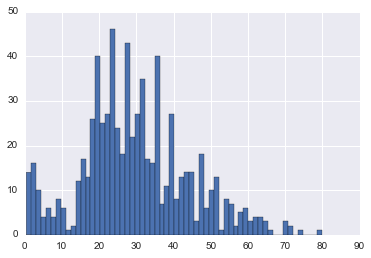

In [148]:
titanicDF['Age'].hist(bins=60)

In [149]:
titanicDF['Age'].mean()

29.69911764705882

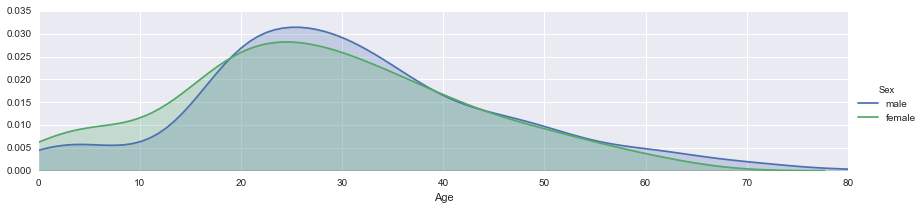

In [150]:
fig = sns.FacetGrid(titanicDF, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanicDF['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

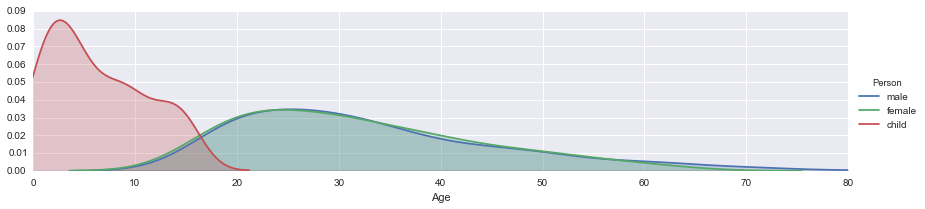

In [151]:
fig = sns.FacetGrid(titanicDF, hue='Person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanicDF['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
#NB should not go past 16 for child!

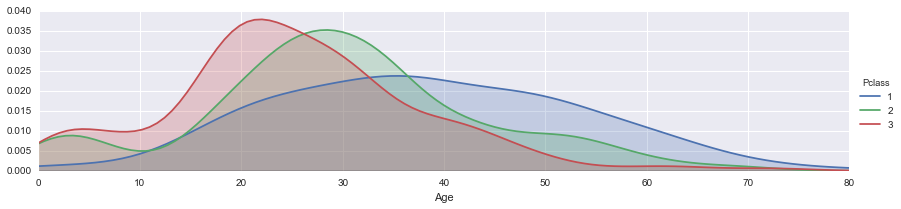

In [152]:
fig = sns.FacetGrid(titanicDF, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanicDF['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [153]:
deck = titanicDF['Cabin'].dropna()

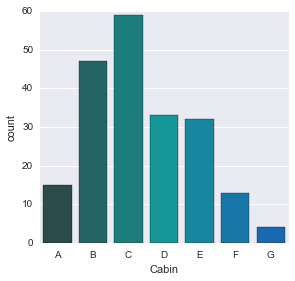

In [154]:
levels = []

for level in deck :
    levels.append(level[0])

cabinDF = pd.DataFrame(levels)
cabinDF.columns = ['Cabin']
cabinDF = cabinDF[cabinDF.Cabin != 'T']
sns.factorplot('Cabin', data=cabinDF, palette='winter_d', kind='count',order=['A','B','C','D','E','F','G'])

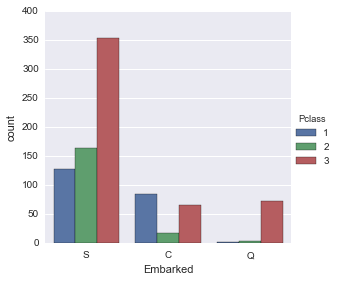

In [155]:
sns.factorplot('Embarked', data=titanicDF, hue='Pclass', kind='count')


In [156]:
titanicDF['Alone'] = titanicDF.SibSp + titanicDF.Parch

In [157]:
titanicDF['Alone'].loc[titanicDF['Alone'] > 0] = 'With Family'
titanicDF['Alone'].loc[titanicDF['Alone'] == 0] = 'Alone'
#titanicDF['Person'] = titanicDF[['Age', 'Sex']].apply(maleFemaleChild, axis=1)

In [158]:
titanicDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone


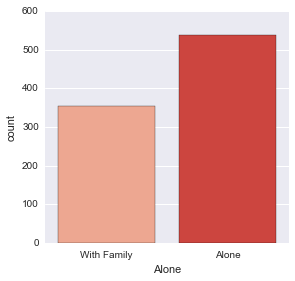

In [159]:
sns.factorplot('Alone', data=titanicDF, palette='Reds', kind='count')

In [160]:
titanicDF['Survivor'] = titanicDF['Survived'].map({0:'no', 1:'yes'})

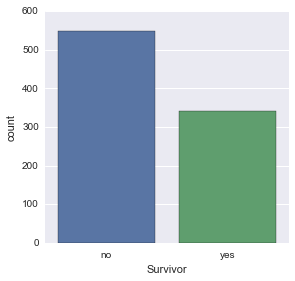

In [161]:
sns.factorplot('Survivor', data=titanicDF, kind='count')

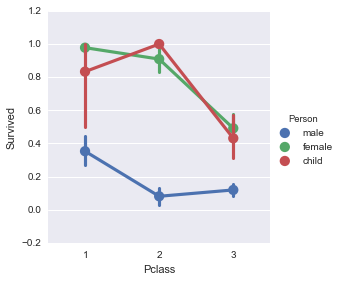

In [162]:
sns.factorplot('Pclass','Survived', hue='Person', data=titanicDF)

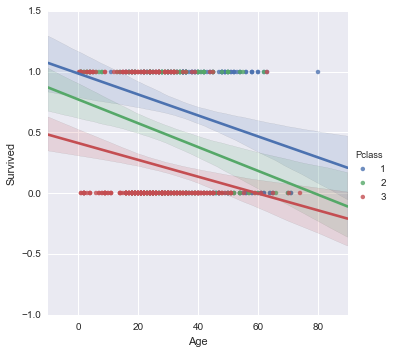

In [163]:
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanicDF)

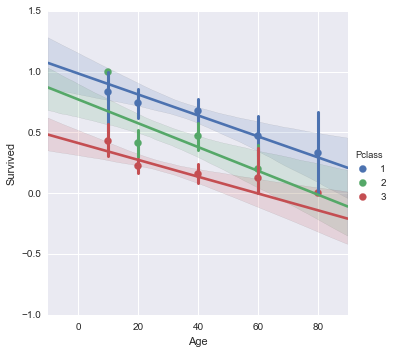

In [164]:
generations = [10, 20, 40, 60, 80]
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanicDF, x_bins=generations)

In [193]:
deck = titanicDF[['Cabin', 'Survivor']].dropna()
deck.head()

,Cabin,Survivor
1,C85,yes
3,C123,yes
6,E46,no
10,G6,yes
11,C103,yes


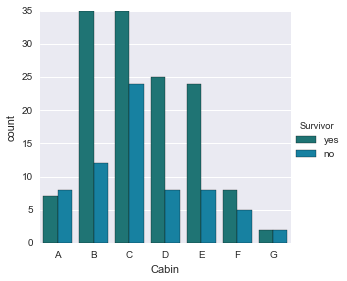

In [232]:
levels = []

for level in deck['Cabin'] :
    levels.append(level[0])

cabinDF = pd.DataFrame({'Cabin': levels, 'Survivor': deck['Survivor']})
cabinDF = cabinDF[cabinDF.Cabin != 'T']
sns.factorplot('Cabin', data=cabinDF, hue='Survivor', palette='winter_d', kind='count',order=['A','B','C','D','E','F','G'])


In [233]:
cabinDF.index = np.arange(0, len(cabinDF))
cabinDF.head()

,Cabin,Survivor
0,C,yes
1,C,yes
2,E,no
3,G,yes
4,C,yes


In [243]:
# Want to plot probability of survival vs Cabin location...
df2 = pd.DataFrame(cabinDF.groupby(['Cabin', 'Survivor']).size())
df2.columns = ['Count']
# Multi-index DF

Count
Cabin Survivor       
A     no            8
      yes           7
B     no           12
      yes          35
C     no           24
      yes          35
D     no            8
      yes          25
E     no            8
      yes          24
F     no            5
      yes           8
G     no            2
      yes           2

In [271]:
grouped = df2.groupby(level=0)
df3 = grouped.sum()
df3

,Count
Cabin,
A,15
B,47
C,59
D,33
E,32
F,13
G,4


[<matplotlib.text.Text at 0x1176d2f10>, <matplotlib.text.Text at 0x117533550>]

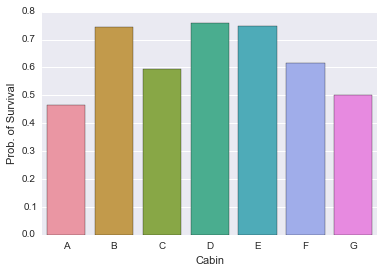

In [287]:
df4 = df2.iloc[df2.index.get_level_values('Survivor') == 'yes']
df5 = pd.DataFrame(df4['Count']/df3['Count']).reset_index()
del df5['Survivor']
df6 = df5.groupby('Cabin').sum()
ax = sns.barplot(x=df6.index, y=df6.Count)
ax.set(xlabel='Cabin', ylabel='Prob. of Survival')

In [270]:
df3 = pd.DataFrame({'Cabin': ['A','B','C','D','E','F','G'], 'Prob. of Survival': [7.0/15.0, 35.0/47.0, 35.0/59.0, 25.0/33.0, 
                                                                                 24.0/32.0, 8.0/13.0, 0.5]})
df3.index = df3['Cabin']
df3.head()

,Cabin,Prob. of Survival
Cabin,,
A,A,0.466667
B,B,0.744681
C,C,0.593220
D,D,0.757576
E,E,0.750000


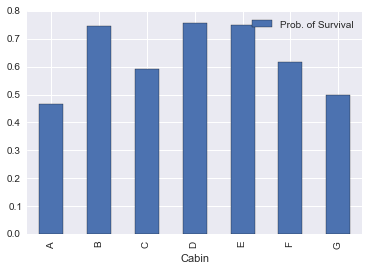

In [251]:
df3.plot(kind='bar')